In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns
import datetime

In [4]:
def costFun(Theta,x_train,y_train):
    s=np.sum((np.matmul(Theta,x_train)-y_train)**2);
    return (1/(2*y_train.shape[1]))*s;

def diffCostFun(Theta,x_train,y_train):
    b=0;
    b=np.dot((np.matmul(Theta,x_train)-y_train),np.transpose(x_train));
    b=b/(y_train.size);
    return b;
  
def fitGD(x_train,y_train,alpha,lamda,Type,iterations,pt):
    n=x_train.shape[0]
    Theta=np.ones(n,dtype=float);
    m=y_train.shape[1];
    for itr in range(iterations):
        if Type==1:
          r1=0.;
          r2=np.zeros(2);
          r1=(np.sum(np.absolute(Theta)))*lamda/(2*m);
          r2=(lamda/(2*m));
          k=diffCostFun(Theta,x_train,y_train)+r2;
          Theta=Theta-alpha*k;
   
        if Type==2:
            r1=0;
            r2=np.zeros(n);
            r1=np.sum(np.square(Theta))*lamda/m;
            r2=(lamda/m)*(Theta);
            k=diffCostFun(Theta,x_train,y_train)+r2;
            Theta=Theta-alpha*k;

        if Type==3:
            r1=0;
            r1=0.5*(np.square(Theta)+np.absolute(Theta));
            r2=np.zeros(2);
            r2=(lamda/m)*(0.5*(Theta+0.5*np.ones(Theta.size)));
            k=diffCostFun(Theta,x_train,y_train)+r2;
            Theta=Theta-alpha*k;
    if pt==1:
        plt.plot(cost)
        plt.show()
        plt.scatter(x_train[1],y_train);
        x = np.linspace(0,12,100)
        y=Theta[0,1]*x+Theta[0,0];
        plt.plot(x,y,"r-");
        plt.show()
    return Theta;
def fitNormal(x_train,y_train):
    yn= np.transpose(y_train);
    xn=np.transpose(x_train);
    return np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(xn),xn)),np.transpose(xn)),yn)



df = pd.read_excel('AirQualityUCI.xlsx')
d1=df

df['HOUR']=df['Time'].apply(lambda x: int(x.strftime('%H')))
df.HOUR.head()

df['Date']=pd.to_datetime(df.Date, format='%m/%d/%Y')
df.set_index('Date',inplace=True)
df['Month']=df.index.month
df.reset_index(inplace=True)
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,HOUR,Month
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,18,3
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,19,3
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,20,3
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,21,3
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,22,3


In [5]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
 15  HOUR           9357 n

(9357, 17)

In [6]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,HOUR,Month
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604,11.498557,6.310356
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670,6.923182,3.438160
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,0.000000,1.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275,5.000000,3.000000
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823,11.000000,6.000000
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223,18.000000,9.000000
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036,23.000000,12.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()


Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
HOUR             0
Month            0
dtype: int64

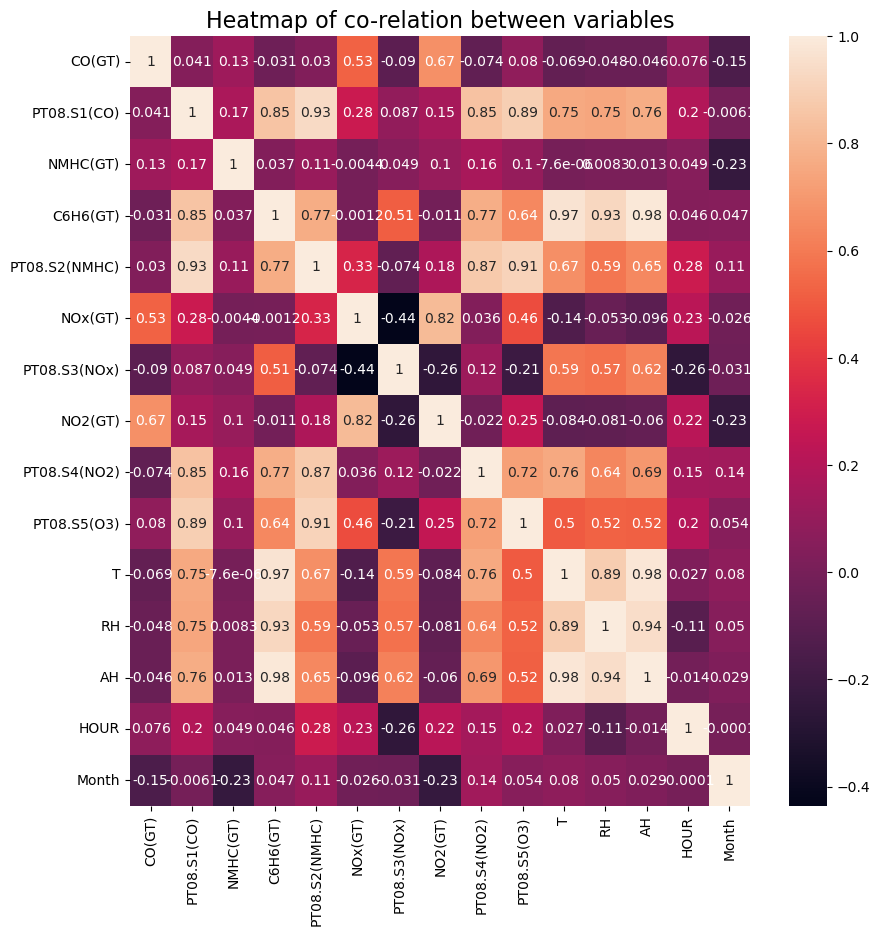

In [9]:
fig = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(),annot=True)
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()
     

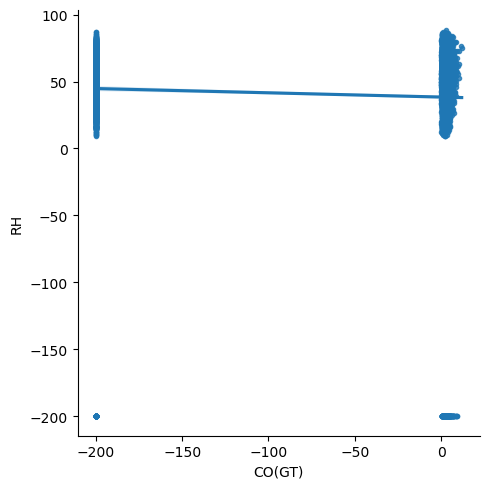

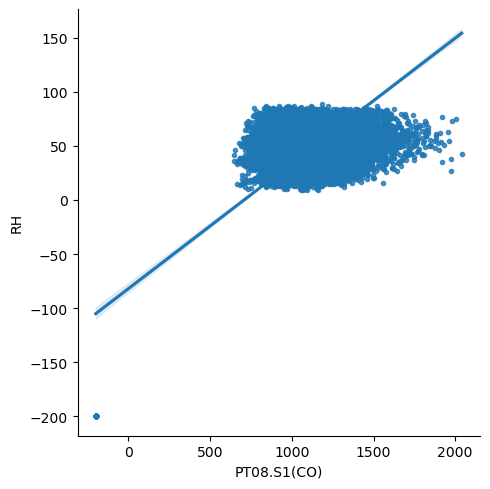

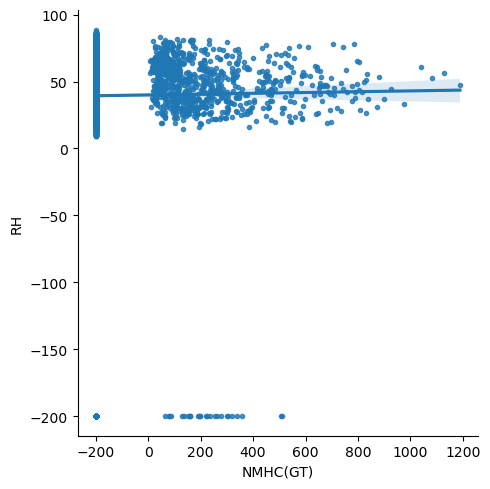

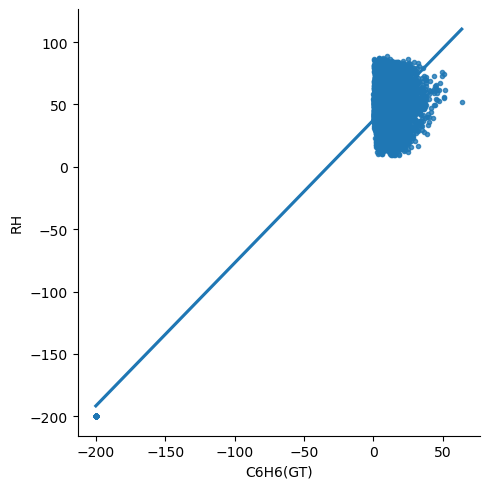

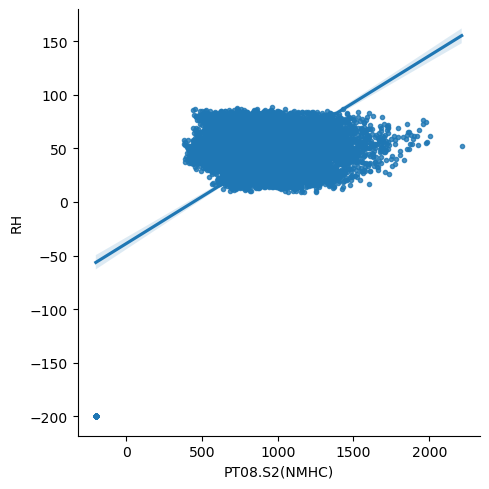

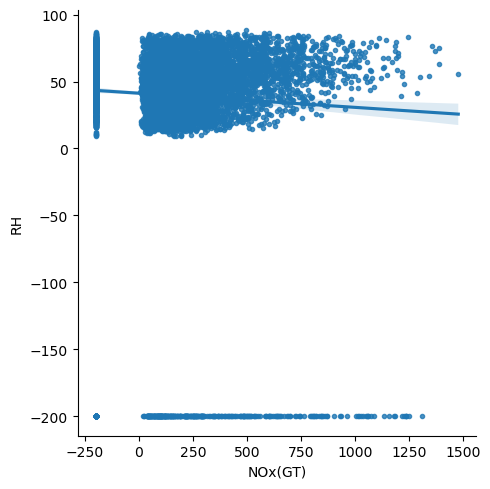

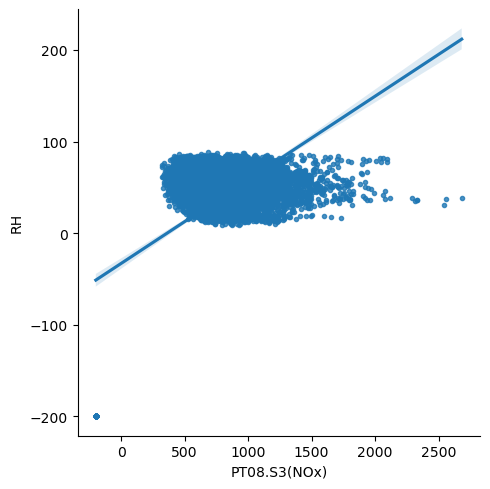

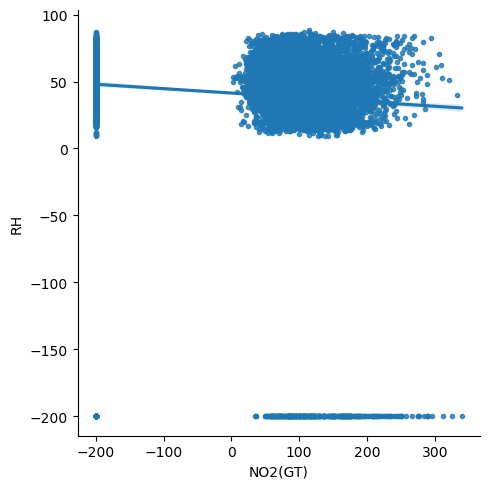

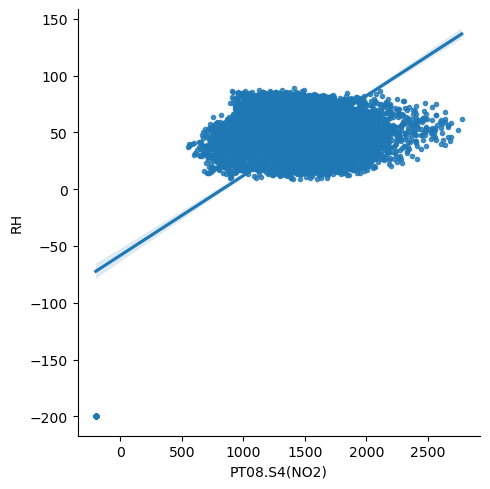

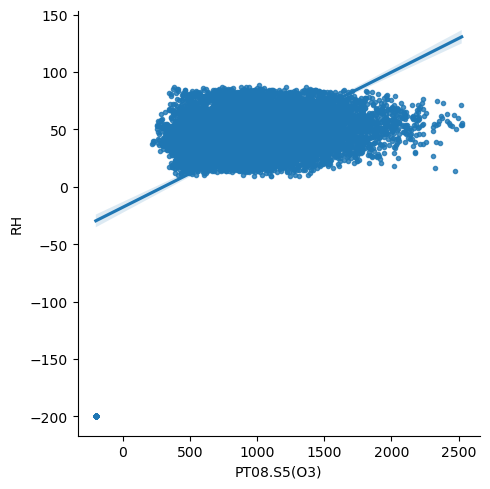

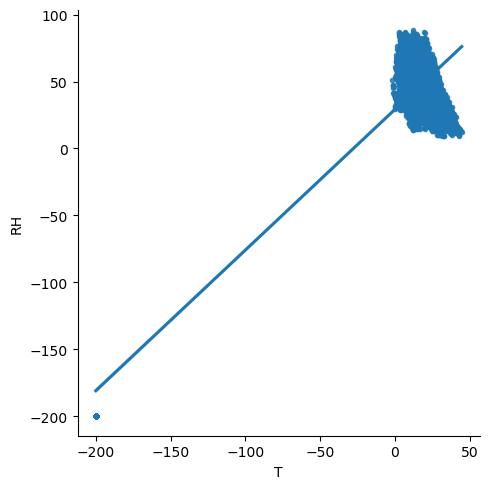

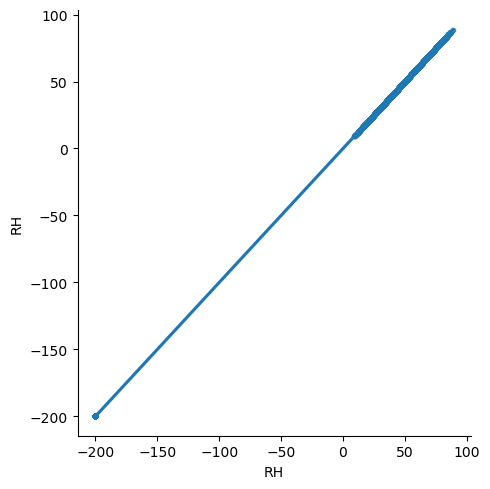

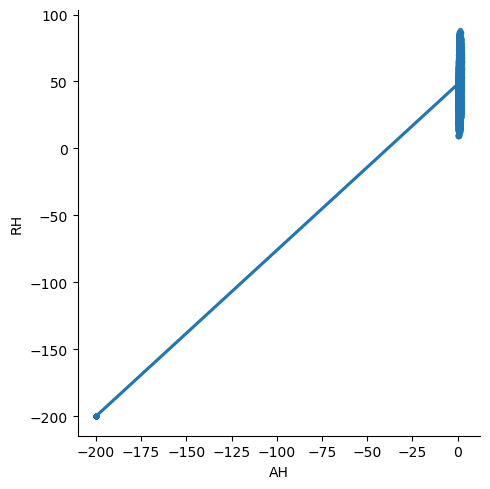

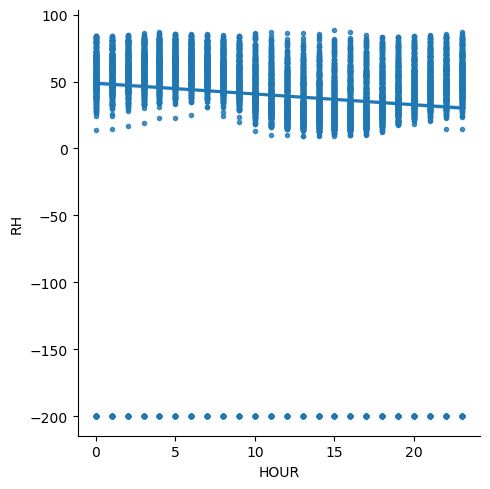

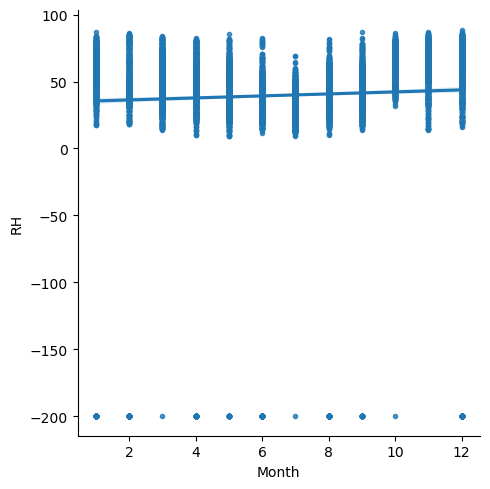

In [10]:
col=df.columns.tolist()[2:]
for i in df.columns.tolist()[2:]:
    sns.lmplot(x=i,y='RH',data=df,markers='.')

In [11]:
ar=df.to_numpy()

scaler = sklearn.preprocessing.StandardScaler()
Y=ar[:,13]
x=ar[:,2:17]
scaler.fit(ar[:,2:17])
x=scaler.transform(ar[:,2:17])
x1=x[:,0:11]
x2=x[:,13:15]
cp=x
X=np.append(x1,x2,axis=1)

print(X)

[[ 0.4739999   0.94339273  2.21123554 ...  0.08850233  0.93913327
  -0.96287933]
 [ 0.46627322  0.73796482  1.93938293 ...  0.08155806  1.08358325
  -0.96287933]
 [ 0.46884878  1.07074288  1.76768654 ...  0.04915151  1.22803323
  -0.96287933]
 ...
 [ 0.47142434  0.28238484 -0.29267014 ...  0.39636464  0.0724334
  -0.6720105 ]
 [ 0.467561   -0.14059957 -0.29267014 ...  0.4293499   0.21688338
  -0.6720105 ]
 [ 0.46884878  0.06634442 -0.29267014 ...  0.43340073  0.36133336
  -0.6720105 ]]


In [12]:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y ,test_size=0.10, random_state=42)
Y_train=np.array([Y_train])
Y_test=np.array([Y_test])
X_train=np.transpose(X_train)
X_train=np.append([np.ones(Y_train.size)],X_train,axis=0)
X_test=np.transpose(X_test)
X_test=np.append([np.ones(Y_test.size)],X_test,axis=0)
X_test=np.transpose(X_test)

theta=fitGD(X_train,Y_train,0.01,2,2,100,0)
Y_pred1=np.dot(theta,X_train)
Y_pred2=np.dot(theta,np.transpose(X_test))

Theta=fitNormal(X_train,Y_train)
Y_Pred1=np.dot(np.transpose(X_train),Theta)
Y_Pred2=np.dot(X_test,Theta)


In [13]:

print(theta)
print(Theta)

[[25.39646957323719 0.42692838448831066 8.061512103231516
  -1.308507085243534 12.714221161079562 2.829101098773863
  -0.5840562364434846 11.500132477995278 -1.315907948228541
  3.8926183111778254 4.246710163215996 11.506602126931584
  -4.292093089971057 0.4239812101357443]]
[[39.510808138522684]
 [0.27563124534848255]
 [8.29902607981874]
 [-1.4389134088114552]
 [148.08080841274042]
 [-67.19754323342421]
 [2.1200929853179797]
 [-11.829349592575172]
 [-1.50187510549639]
 [24.51274816151298]
 [1.0748084009123946]
 [-72.01273579201053]
 [0.019702859271488772]
 [4.380667549109548]]


In [14]:

J_train=np.sum((Y_train-Y_pred1)**2/(2*Y_train.shape[0]))
print(J_train)
J_test=np.sum((Y_test-Y_pred2)**2/(2*Y_test.shape[0]))
print(J_test)
J_trainN=np.sum((Y_train-Y_Pred1)**2/(2*Y_train.shape[0]))
print(J_trainN)
J_testN=np.sum((Y_test-Y_Pred2)**2/(2*Y_test.shape[0]))
print(J_testN)
     

2517035.271319823
275896.0562469782
185471432706.3907
2018835650.2445362


In [16]:
print(Y_test)
print(Y_pred2)

[[34.85000038147 49.875 32.25 33.974999904633 39.22500038147
  81.349998474121 56.89999961853 32.500000476837 74.89999961853
  31.525000572205 71.650001525879 77.25 82.89999961853 49.325000762939
  40.050000190735 20.800000190735 54.824999809265 47.900000572205
  23.800000190735 31.050000190735 34.549999237061 37.324999809265 -200.0
  65.300000190735 40.25 -200.0 40.47500038147 33.625 48.474999427795
  60.000000953674 46.800000190735 45.0 56.27499961853 83.825000762939
  66.325000762939 44.425001144409 37.52499961853 34.450000762939
  57.85000038147 73.300000508626 29.25 80.800001144409 33.550000667572
  48.60000038147 68.599998474121 60.525000572205 52.52499961853
  23.150000095367 40.525000572205 42.625 61.02499961853 63.22500038147
  28.924999237061 61.050000190735 66.449998855591 58.900000572205
  48.72500038147 41.125 27.77499961853 55.25 63.050000190735
  45.400000572205 32.625000476837 43.900000572205 68.049999237061
  51.89999961853 18.625 49.675000190735 55.449999809265 15.149